In [17]:
# TODO:
#  Certains model nom doublé ex (x-trail x-trail)
#  Alphabet géorgien à extraire des modèles
#  Suppr des classes pas suffisement représentés ?
#  Vérifier le type des series

In [18]:
import pandas as pd
import pandas
import matplotlib.pyplot as plt
from cleaning_func import clean_manufacturer, clean_mileage, clean_price, clean_engine_volume, clean_doors, clean_model, clean_cylinders, clean_wheel_v2, clean_leather_interior_v2

In [19]:
df = pd.read_csv('./original.csv')

In [20]:
# Suppression des doublons
df.drop_duplicates(keep='first', inplace=True)

In [21]:
# Colonnes enlevés: ID, Levy, Airbags
df = df[['Price', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Leather interior',
         'Fuel type', 'Engine volume', 'Mileage', 'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color','Airbags']]

In [22]:
df = clean_manufacturer(df, ['სხვა', 'TESLA'],
                        'Manufacturer')  # Manufacturer => 3 lignes
df = clean_price(df, min=500, max=1000000)  # Price => 1664 lignes
df = clean_mileage(df, min=500, max=1000000)  # Mileage => 677 lignes
df = clean_engine_volume(df, 0.5, 8)  # Engine volume => 28 lignes
df = clean_cylinders(df, min=3.0, max=12)  # Cylinders => 37 lignes
df = clean_doors(df)  # Doors => 0 lignes
df = clean_model(df)  # Model => 0 lignes
df = clean_wheel_v2(df)  # Wheel => 0 lignes
df = clean_leather_interior_v2(df)  # Leather interior => 0 lignes

In [23]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df.head())

   Price Manufacturer    Model  Prod. year   Category Leather interior Fuel type  Engine volume  Mileage  Cylinders Gear box type Drive wheels Doors        Wheel   Color  Airbags  Turbo
0  13328        LEXUS   RX 450        2010       Jeep          leather    Hybrid            3.5   186005        6.0     Automatic          4x4     5   Left_wheel  Silver       12  False
1  16621    CHEVROLET  Equinox        2011       Jeep       no_leather    Petrol            3.0   192000        6.0     Tiptronic          4x4     5   Left_wheel   Black        8  False
2   8467        HONDA      FIT        2006  Hatchback       no_leather    Petrol            1.3   200000        4.0      Variator        Front     5  Right_wheel   Black        2  False
3   3607         FORD   Escape        2011       Jeep          leather    Hybrid            2.5   168966        4.0     Automatic          4x4     5   Left_wheel   White        0  False
4  11726        HONDA      FIT        2014  Hatchback          leather

In [34]:
liste_price = []
for elt in df['Model'].unique():
    liste_price.append(elt)

liste_price.sort()
print(liste_price)

for elt in liste_price:
    print(elt)

['09-Mar', '100', '100 NX', '1000', '1111', '114', '118', '118 2,0', '118 M-sport LCI', '120', '128', '128 M tech', '130', '1300', '135', '147', '1500', '1500,1600 Schtufenheck', '159', '166', '190', '20', '200', '206', '207', '208', '21 3.0', '2101 01', '2103 03', '2105', '2106', '2107', '2107 07', '2109', '2121 (Niva)', '2140', '216', '220', '225', '230', '230 W153', '24', '24 10', '250', '270', '280', '290', '3.18E+38', '3.20E+38', '3.25E+48', '300', '300 LIMITED', '3008', '3008 2.0', '307', '31105', '31514', '31514 UAZ', '316', '316 i', '318', '318 m', '320', '320 2.0', '320 2.2', '320 320', '320 DIESEL', '320 Diesel', '320 Gran Turismo', '320 I', '320 M', '320 i', '32214', '322173', '323', '323 F', '325', '325 CI', '325 XI', '325 i', '328', '328 DIZEL', '328 DRIFT CAR', '328 Xdrive', '328 i', '328 sulev', '330', '335', '335 335i', '335 D', '335 M paket', '370Z', '3796', '400', '400X', '406', '407', '416', '420', '428', '428 Sport Line', '428 i', '435', '435 CUPE', '456', '4Runner'

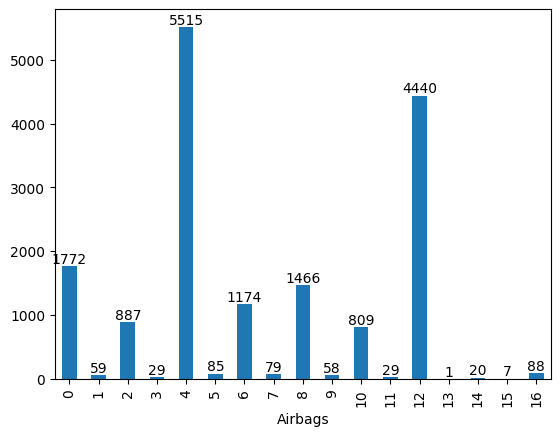

In [33]:
airbags_counts = df['Airbags'].value_counts()
airbags_counts = airbags_counts.sort_index()
ax = airbags_counts.plot(kind='bar')

for i, count in enumerate(airbags_counts):
    ax.annotate(str(count), (i, count), ha='center', va='bottom')
plt.show()